#Importing Libraries and Conversion to Grayscale

In [ ]:
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

In [ ]:
image = cv2.imread('/content/ipcv5.jpg')
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_copy = grayscale_image.copy()

(-0.5, 999.5, 666.5, -0.5)

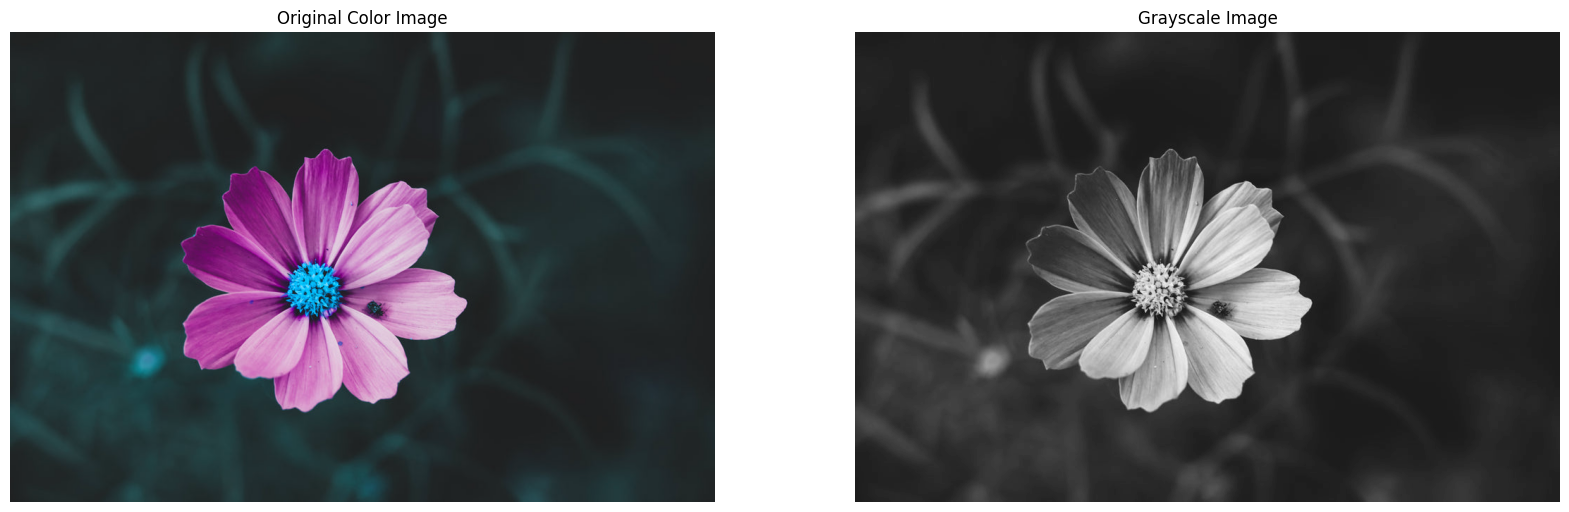

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.title("Original Color Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Grayscale Image")
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')

#Noisy Image Processing

In [ ]:
noisy_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
row, column, _ = image.shape
noisy_image = np.zeros((row,column), dtype = 'uint8')
mean =0
std_dev = 20
gaussian_noise = np.random.normal(mean, std_dev, (row, column))
noisy_image= np.clip(grayscale_image + gaussian_noise, 0, 255).astype(np.uint8)

(-0.5, 999.5, 666.5, -0.5)

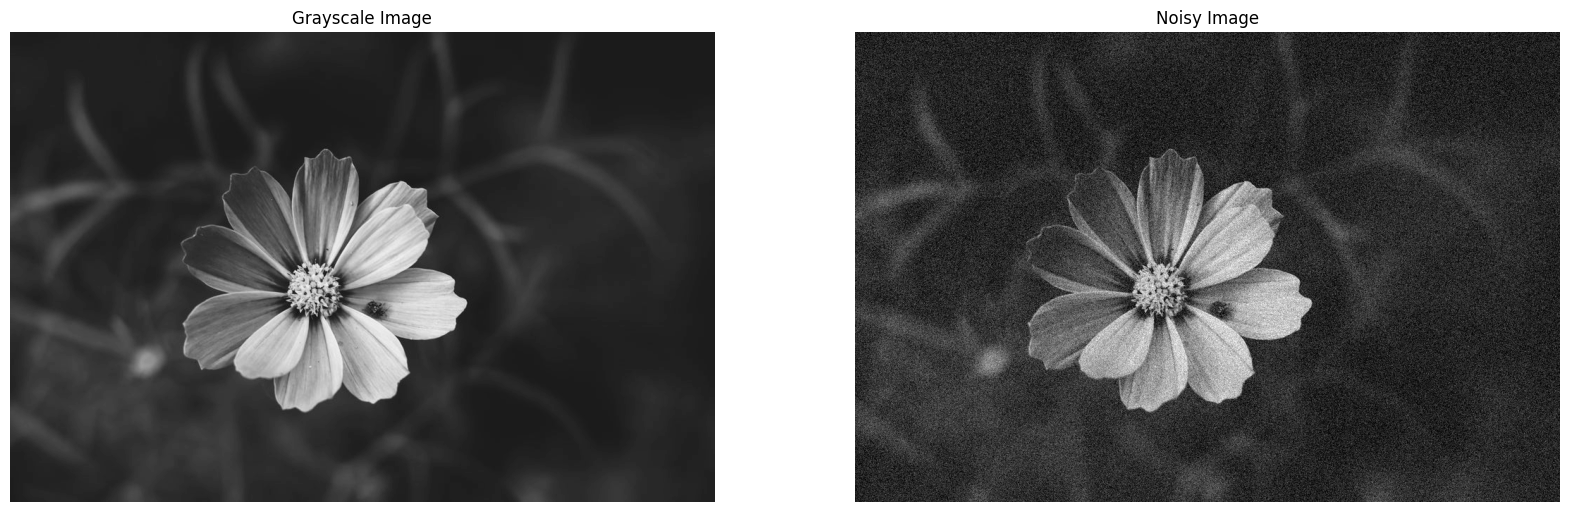

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.title("Grayscale Image")
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Noisy Image")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

#Noise Removal from the Image

In [ ]:
def filtered_image(image, mask):
    row, column = image.shape
    mask_height, mask_width = mask.shape
    pad_height = mask_height // 2
    pad_width = mask_width // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    filtered_img = np.zeros((row, column))

    for i in range(row):
        for j in range(column):
            part = padded_image[i:i + mask_height, j:j + mask_width] * mask
            filtered_img[i, j] = part.sum()

    return filtered_img

In [ ]:
mask_size = 3
mask = np.ones((mask_size, mask_size)) / (mask_size**3)
removed_noise = filtered_image(noisy_image, mask)

(-0.5, 999.5, 666.5, -0.5)

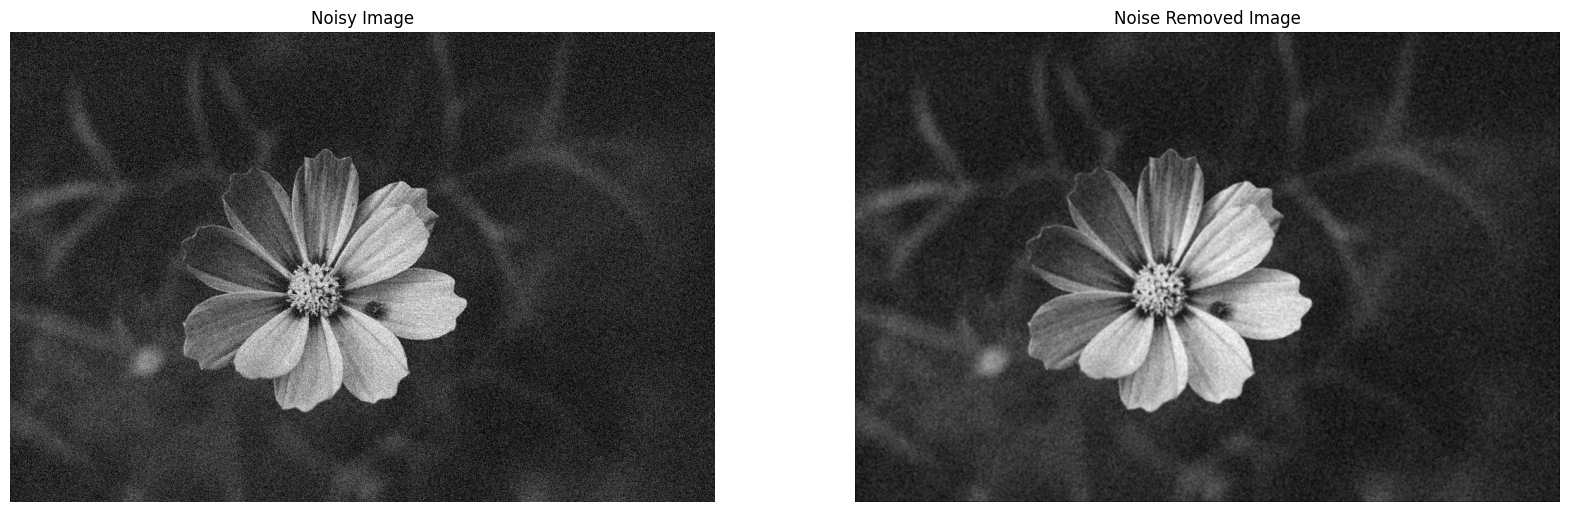

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.title("Noisy Image")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Noise Removed Image")
plt.imshow(removed_noise , cmap='gray')
plt.axis('off')

#Salt and Pepper Image

In [ ]:
def add_salt_pepper_noise(image):
    row, column = image.shape
    number_of_pixels = random.randint(300, 8000)
    for _ in range(number_of_pixels):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, column - 1)
        image[y_coord, x_coord] = 255
    for _ in range(number_of_pixels):
        y_coord = random.randint(0, row - 1)
        x_coord = random.randint(0, column - 1)
        image[y_coord, x_coord] = 0

    return image

(-0.5, 999.5, 666.5, -0.5)

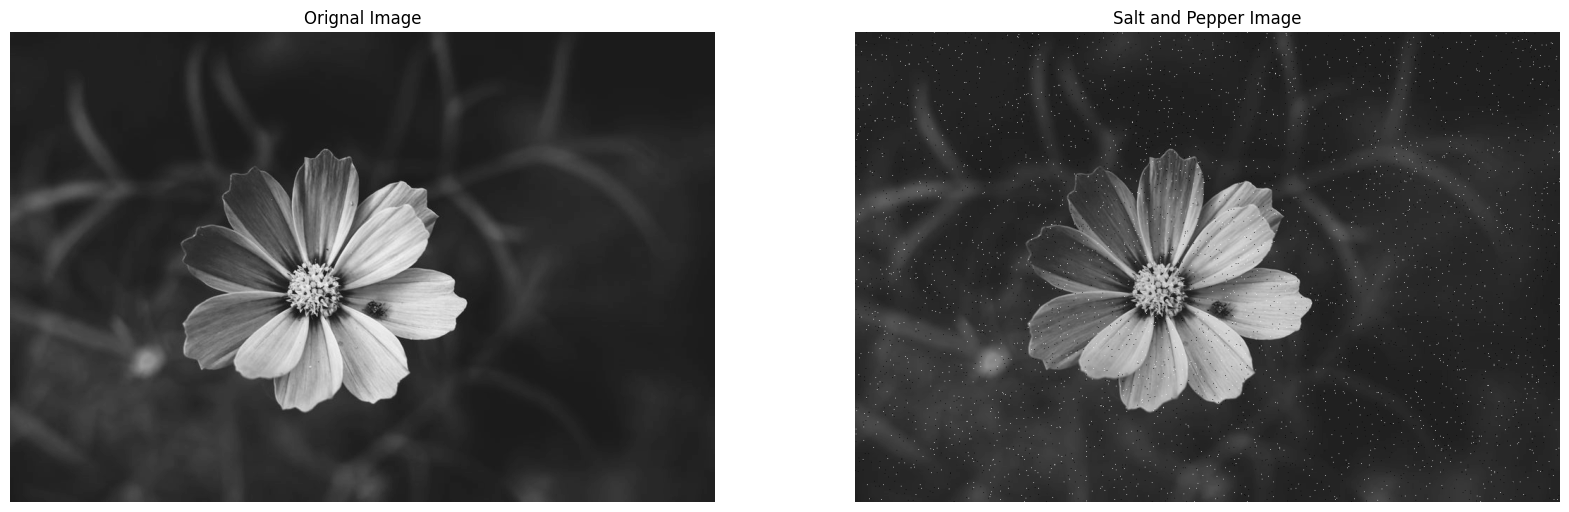

In [ ]:
salt_and_pepper_image = add_salt_pepper_noise(grayscale_image)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.title("Orignal Image")
plt.imshow(image_copy, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Salt and Pepper Image")
plt.imshow(salt_and_pepper_image, cmap='gray')
plt.axis('off')

In [ ]:
def median_filter(image):
    row, column = image.shape
    mh, mw = 3, 3
    new_image = np.zeros((row, column))

    for i in range(row - mh + 1):
        for j in range(column - mw + 1):
            rows = range(i, i + mh)
            cols = range(j, j + mw)
            part = np.sort(np.ravel(image[np.ix_(rows, cols)]))
            new_image[i, j] = part[len(part) // 2]

    return new_image

(-0.5, 999.5, 666.5, -0.5)

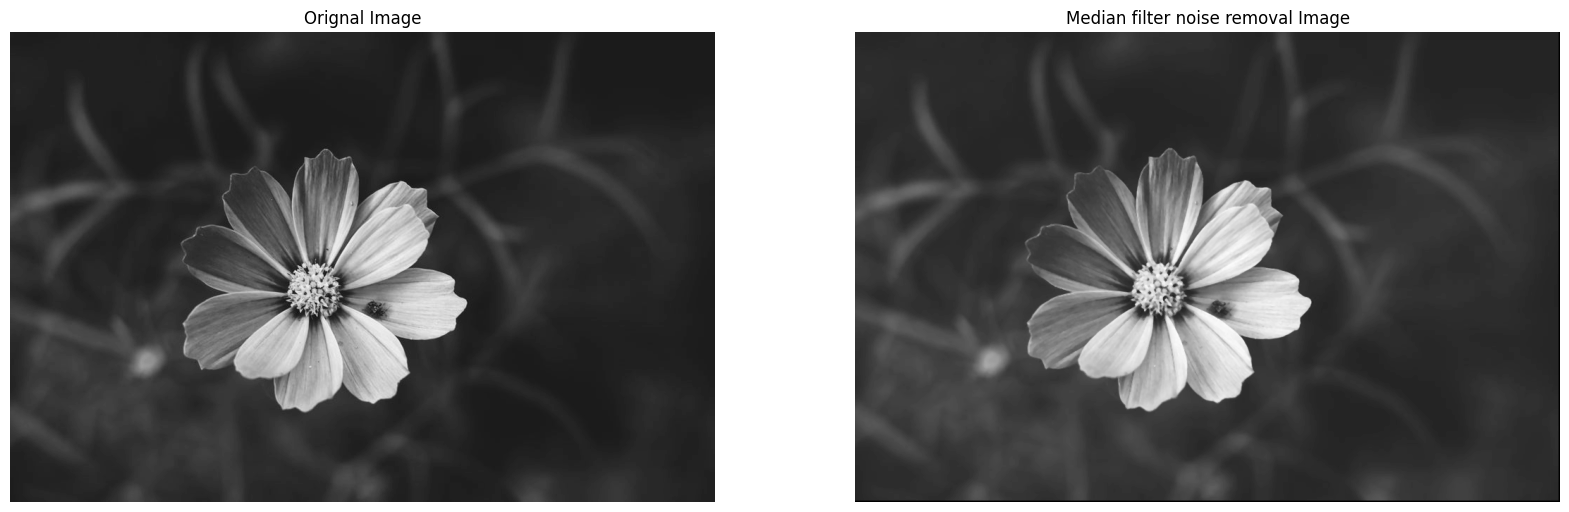

In [ ]:
median_filtered_image = median_filter(salt_and_pepper_image)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.title("Orignal Image")
plt.imshow(image_copy, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Median filter noise removal Image")
plt.imshow(median_filtered_image, cmap='gray')
plt.axis('off')

#Observations

**Gaussian Noise:**
Gaussian noise introduces random fluctuations in pixel intensities, resulting in a blurring effect on the image.
The averaging filter effectively mitigates this type of noise by smoothing the image and balancing out pixel variations.

**Salt and Pepper Noise:**
Salt and pepper noise manifests as random black and white pixels, creating sharp contrasts within the image.
The median filter is particularly effective in eliminating salt and pepper noise, as it replaces noisy pixels with the median value of their neighboring pixels, thereby preserving edges and details more effectively than the averaging filter.


#Applications


**Image Processing:** Noise reduction is crucial for various tasks, including image enhancement, object detection, and medical imaging.

**Computer Vision:** Reducing noise enhances the performance of algorithms that rely on image features.

**Signal Processing:** Similar filtering techniques are employed to eliminate noise from audio and video signals.

**Medical Imaging:** Noise reduction is vital for improving the quality of images from modalities such as X-rays and MRI scans.

#Conclusion


Averaging filters are effective for smoothing images and minimizing Gaussian noise. Median filters, being more resistant to outliers, are better suited for preserving edges and handling salt and pepper noise.